# Premières manipulations

On utilisera pandas : https://pandas.pydata.org/ pour nos données

Un data frame c'est une matrice. où :
  - une ligne c'est un objet
  - une colonne c'est un attribut

Un dataframe décrit des individus par un ensemble de caractéristiques qui peuvent être de nature diverses :
  - nombre réel
  - entier (attention à la moyenne)
  - catégorie (couleur, oui/non, femme/homme, ...)
  - ordre
  
Il peut y avoir des colonnes de prédictions (oui/non, valeur, ...)

Il y a tout un tas d'autres types de données :

  - time series (ce n'est pas une série netflix...) : évolution d'une données réelle dans le temps (comme le prix de l'action netflix justement)
  - données spaciales : coordonée + type de données (maison, forêt, etc)
  - graphes (relations)

## Lire des données

On va utiliser des données de l'insee sur les prénoms donnés aux enfants Français : https://www.insee.fr/fr/statistiques/7633685?sommaire=7635552

Lorsque l'on lit des données, il est **crucial** de ne pas se précipiter. On va suivre le protocole suivant :

1. On télécharge les données et on les lit avec un éditeur de texte/excel pour **voir** les données
2. Si les données sont dans un format texte, on charge le fichier avec un **éditeur de texte** (comme [visual studio](https://visualstudio.microsoft.com/fr/) par exemple) pour **analyser** le format utilisé car il existe toujours plein de variantes d'un même format
3. dans un projet vide, on construit la (ou les) commande(s) permettant de charger les données
4. **on vérifie que ce qui est chargé est conforme à ce qu'on veut !**. Ce n'est souvent pas le cas. Par exemple :
    - nombres qui sont lus comme des chaines de caractères,
    - séparateur de décimal non correct,
    - accents décadents (si le fichier n'est pas encodé en utf-8)
    - première ligne prise pour des données alors que c'est le nom des colonnes
    - ... (tellement de possibilités d'erreurs que l'ion ne peut tous les noter)
5. on copie/colle les commandes de chargement dans le projet existant.

### Téléchargement des données

Le lien https://www.insee.fr/fr/statistiques/7633685?sommaire=7635552 mène sur le site de l'insee et d la version 2022 des prénoms. On va télécharger le fichier "*France (y compris Mayotte depuis 2013)*" au format [csv](https://fr.wikipedia.org/wiki/Comma-separated_values).

C'est un fichier zip que l'on décompresse. Il se nomme _nat2022.csv_

#### Excel

On ouvre le fichier avec excel. On remarque :

- le fichier comporte 4 colonnes, dont le nom est la première ligne
    - `sexe` : le sexe
    - `preusuel` : prénom usuel
    - `annais` : année naissance
    - `nombre` : nombre d'enfants de ce nom et ce sexe né [cette année là](https://www.youtube.com/watch?v=Oei7OKqadS8)
- il y a 667365 lignes (c'est à la fois beaucoup et peu)

Le dictionnaire des modalités est décrit : https://www.insee.fr/fr/statistiques/2540004?sommaire=4767262#dictionnaire

On peut remarquer que :

- le sexe est 1 pour les ♂ et 2 pour les ♀ (c'est le format standard)
- aucun enfant ne s'appelle *_PRENOMS_RARES*... La modalité est expliquée là : https://www.insee.fr/fr/statistiques/2540004?sommaire=4767262#documentation
- l'année de naissance peut être *XXXX*, qui n'est pas un nombre.

#### Éditeur de texte

En ouvrant fichier avec un éditeur de texte (jupyter permet de le faire, ou [vscode](https://code.visualstudio.com/) par exemple), on se rend compte que le séparateur n'est pas la `,` mais le `;`.

> **Danger** : Cette pratique est courante lorsque le fichier est sauvé par un excel français, où la virgule est le séparateur de décimal.

Pour éviter tout soucis, je vous conseille de rester international dans vos fichiers :

- séparateur de décimal : `.`
- séparateur de colonnes : `,`

Mais ici on a pas le choix, les données sont de ce type. Il faut faire avec.

> **Règle d'or** : On ne modifie pas le fichier de données initial, on modifie la procédure de chargement.

### Lecture des données avec jupyter

En panda, la lecture de fichier csv se fait avec la commande : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

Il faut trouver le moyen :

- charger un fichier dans une url (en copiant le lien depuis
- de lire des fichiers zip
- de changer le séparateur de colonnes


Je vais utiliser la version 2020 de ce jeu de données, disponible sur le site du cours. N'hésitez pas à prendre la dernière version sur le site de l'insee.

In [7]:
import pandas
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [10]:
pandas.__version__

'2.2.3'

Pandas nous permet de lire le fichier depuis notre disque dur, à l'endroit où est notre fichier jupyter :

Mais on peut aussi le récupérer directemnt depuis internet si on connait son adresse (version 2021) :

In [12]:
# dé-commentez les 3 lignes ci-après pour le faire

prénom = pandas.read_csv("http://www.insee.fr/fr/statistiques/fichier/2540004/nat2021_csv.zip",
                          compression='zip',
                          sep=";")

In [6]:
prénom

,sexe,preusuel,annais,nombre
0,1,_PRENOMS_RARES,1900,1249
1,1,_PRENOMS_RARES,1901,1342
2,1,_PRENOMS_RARES,1902,1330
3,1,_PRENOMS_RARES,1903,1286
4,1,_PRENOMS_RARES,1904,1430
...,...,...,...,...
686533,2,ZYNEB,2018,5
686534,2,ZYNEB,2019,7
686535,2,ZYNEB,2020,8
686536,2,ZYNEB,2021,6


Les données sont chargées, on vérifie que tout est correct.

In [ ]:
# premières lignes.
prénom.head(30)

,sexe,preusuel,annais,nombre
0,1,_PRENOMS_RARES,1900,1249
1,1,_PRENOMS_RARES,1901,1342
2,1,_PRENOMS_RARES,1902,1330
3,1,_PRENOMS_RARES,1903,1286
4,1,_PRENOMS_RARES,1904,1430
5,1,_PRENOMS_RARES,1905,1472
6,1,_PRENOMS_RARES,1906,1451
7,1,_PRENOMS_RARES,1907,1514
8,1,_PRENOMS_RARES,1908,1509
9,1,_PRENOMS_RARES,1909,1526


In [ ]:
# dernières lignes
prénom.tail(15)

On vérifie le type des données :

In [9]:
# forme du dataframe
prénom.shape

(686538, 4)

In [15]:
len(prénom.index), len(prénom.columns)

(686538, 4)

In [13]:
prénom.columns

Index(['sexe', 'preusuel', 'annais', 'nombre'], dtype='object')

Type des données. `object`signifiant chaine de caractère. C'est le cas de `annais` à cause des `XXXX`.

In [14]:
prénom.dtypes

sexe         int64
preusuel    object
annais      object
nombre       int64
dtype: object

## Transformer les données

On va maintenant essayer de voir ce qu'il y a dans les données. Pour cela, on va extraire de celles-ci un sous ensemble des données permettant de répondre à une question spécifique que l'on se pose.

> **Rappel** : On copie toujours les données initiales, on ne les modifie **jamais**

### Chaînage des données

Pour transformer les données, on va chaîner les opérations, chaque opération élémentaire etant passée à l'opération suivante : une opération complexe est un chaînage d'opérations simple.

Cette technique rend le code lisible et réutilisable. Deux
tutos bien fait sur ces méthodes :

* https://towardsdatascience.com/the-unreasonable-effectiveness-of-method-chaining-in-pandas-15c2109e3c69
* https://tomaugspurger.github.io/posts/modern-1-intro/

>  **Bonne pratique** : On utilise le plus souvent possible des opérations qui recréent de nouveaux tableaux, ce qui permet de respecter la règle d'or : **ON NE MODIFIE JAMAIS LES DONNEES INITIALES !** (je l'ai déjà dit, non ?)

### tutos

Il existe de nombreux tutos pour manipuler les données en pandas. Il ne faut pas hésiter à chercher un peu pour faire ses analyses.

* https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html
* http://queirozf.com/entries/pandas-dataframe-examples-column-operations
* https://wiki.centrale-marseille.fr/informatique/public:appro-s7:td6
* https://geo-python.github.io/2017/
* https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html
* ...

Et bien sur, la doc officielle : https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

### exemple : les prénoms les plus populaires

On veut connaître les prénoms les plus donnés.

On va effectuer plusieurs opérations sur les données, d'abord individuellement, puis en les chaînant.

####  renommage de colonnes

Renommons les colonnes que l'on va utiliser en quelque chose de plus explicite.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

In [ ]:
prénom.rename(columns={"preusuel": "prénom", "annais": "années"})

Rename redonne un nouveau dataframe, on a pas modifié les données initiales.


In [ ]:
# décommentez l'instruction ci-dessous pour voir que les données initiales sont conservées.

# prénom.columns

#### changement des modalités

On va dire que les garçons c'est ♂ et les filles c'est ♀, c'est plus explicit qu'un codage 1, 2.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.assign.html

Ici, on crée une nouvelle colonne qui a le même nom que l'ancienne, ce qui revient à la modifier.

Pour comprendre comment on fait on va procéder par étapes :

1. qu'est-ce qu'une colonne en panda
2. comment créer une colonne
3. comment assigner une colonne
4. combiner le tout pour changer notre colonne

In [ ]:
# une colonne

prénom.sexe

Une autre façon de trouver une colonne :

In [ ]:
# décommentez pour voir

prénom['sexe']

,sexe
0,1
1,1
2,1
3,1
4,1
...,...
686533,2
686534,2
686535,2
686536,2


In [ ]:
#la nouvelle colonne

['♂' if x == 1 else '♀' for x in prénom.sexe]

['♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂',
 '♂'

L'exemple précédent utilise les [list comprehension](https://www.w3schools.com/python/python_lists_comprehension.asp)  qui sont des façons rapide de créer des listes.

C'est équivalent à :

In [ ]:
ma_liste = []

for x in prénom.sexe:
    if x == 1:
        ma_liste.append('♂')
    else:
        ma_liste.append('♀')

ma_liste

La méthode [assign](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html) permet d'ajouter/remplacer une colonne existante. On peut procéder de deux façons :

1. en assignatnt directement la colonne
2. en passant par une fonction

In [ ]:
#méthode 1 :

prénom.assign(sexe=['♂' if x == 1 else '♀' for x in prénom.sexe])

In [ ]:
# méthode 2 :

prénom.assign(sexe=lambda df: ['♂' if x == 1 else '♀' for x in df.sexe])

Dans l'esemple précédent on a utilisé une fonction [lambda](https://www.w3schools.com/python/python_lambda.asp) qui permet de créer et d'exécuter immédiatement une fonction d'une ligne. C'est très pratique.

C'est équivalent à :

In [ ]:
def f(df):
    return ['♂' if x == 1 else '♀' for x in df.sexe]

prénom.assign(sexe=f)

> **Attention** : on passe la fonction en paramètre, c'est à dire `f`, et pas son résultat qui est `f(x)`

#### on combine les deux

In [ ]:
# A l'ancienne

p2 = prénom.rename(columns={"preusuel": "prénom", "annais": "années"})
p3 = p2.assign(sexe=lambda df: ['♂' if x == 1 else '♀' for x in prénom.sexe])

Notre nouvelle dataframe s'appelle p3 :

In [ ]:
p3

La façon de faire ci-dessus n'est pas très chouette car elle crée des variables dont nous n'avons pas vraiment besoin.

Il est plus efficace de tout faire en une fois, en utilisant la notation pointée :

In [ ]:
prénom.rename(columns={"preusuel": "prénom", "annais": "années"}).assign(sexe=lambda df: ['♂' if x == 1 else '♀' for x in prénom.sexe])

Bon, c'est pas encore ça. On a maintenant tout sur une seule ligne et c'est pas vraiemnt clair ce qu'on fait. On va reformater tout ça pour que ce soit bien plus clair :

In [ ]:
(prénom
    .rename(columns={"preusuel": "prénom", "annais": "années"})
    .assign(sexe=['♂' if x == 1 else '♀' for x in prénom.sexe])
)

> **Attention** : on met tout entre parenthèse pour que python nous laisse aller à la ligne sans penser que c'est une nouvelle instruction

Si on eut sauver nottre nouvelle dataframe dans p3 on peut affecter le résultat :

In [ ]:
p3 = (prénom
    .rename(columns={"preusuel": "prénom", "annais": "années"})
    .assign(sexe=['♂' if x == 1 else '♀' for x in prénom.sexe])
)

Dès qu'on pourra le faire on favorisera ce genre d'écriture. Cela montre bien ce que l'on fait et dans quel ordre on le fait. Le tout sans créer de variables temporaires inutiles et sans modifier les données initiales.

#### grouper les éléments

Il nous faut maintenant sommer les enfants par sexe et nom. Pour cela, on utilise la fonction : [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) connue en base de données.

In [ ]:
prénom.groupby(['preusuel', 'sexe']).sum()

`sum()` somme les attributs sommables.

Sur les versions récente de pandas, la colonnes `annais` est sommée (ce qui n'est pas le cas si vous avez une version de pandas plus anciennes). Comme ce sont des chaînes de caractères, c'est concaténé

> **Attention** : pratiquement toutes les opérations sur les bases de données vont se fier à l'index des colonnes pour travailler.

Ce n'est pas encore parfait, car maintenant notre table ne contient plus qu'une colonne, le groupby étant un index.

In [ ]:
prénom.groupby(['preusuel', 'sexe']).sum().index

In [ ]:
# sans changer l'index

prénom.groupby(['preusuel', 'sexe'], as_index=False).sum()

Là, chaque ligne a juste un numéro. Ceci nous permet de voir qu'il y a 36444 différentes possiblités prénom/sexe dans la table.

#### on recombine le tout

Attention, on achangé les nom des colonnes... Il faut en tenir compte dans notre `groupby`

In [ ]:
(prénom
    .rename(columns={"preusuel": "prénom", "annais": "années"})
    .assign(sexe=lambda df: ['♂' if x == 1 else '♀' for x in prénom.sexe])
    .groupby(['prénom', 'sexe'], as_index=False).sum()
)

#### La fin

On y est presque. Il nous faut juste trier les résultats. Pour cela on utilie la méthode [sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) :

In [ ]:
(prénom
    .rename(columns={"preusuel": "prénom", "annais": "années"})
    .assign(sexe=lambda df: ['♂' if x == 1 else '♀' for x in prénom.sexe])
    .groupby(['prénom', 'sexe'], as_index=False).sum()
    .sort_values(by=['nombre'])
)

Par défaut on trie du plus petit au plus grand. ON veut les plus plus gros en premier :

In [ ]:
(prénom
    .rename(columns={"preusuel": "prénom", "annais": "années"})
    .assign(sexe=lambda df: ['♂' if x == 1 else '♀' for x in prénom.sexe])
    .groupby(['prénom', 'sexe'], as_index=False).sum(numeric_only=True)
    .sort_values(by=['nombre'], ascending=False)
)

#### sauve le resultat

Maintenant qu'on a fini notre composition, on peut sauver le résultat dans ue nouvelle variable

In [ ]:
prénom_triés = (prénom
    .rename(columns={"preusuel": "prénom", "annais": "années"})
    .assign(sexe=lambda df: ['♂' if x == 1 else '♀' for x in df.sexe])
    .groupby(['prénom', 'sexe'], as_index=False).sum(numeric_only=True)
    .sort_values(by=['nombre'], ascending=False)
)

Comme il y a eu une affectation, jupyter n'affiche pas le résultat. Pour le faire, il faut explicitement donner la variable (comme un print).

In [ ]:
prénom_triés

,prénom,sexe,nombre
22844,MARIE,♀,2232235
15681,JEAN,♂,1913420
29253,PIERRE,♂,891947
38266,_PRENOMS_RARES,♀,886692
38267,_PRENOMS_RARES,♂,831985
...,...,...,...
35518,TIPHAYNE,♀,20
24068,MAYERA,♀,20
4805,BERTILLE,♂,20
24069,MAYERON,♂,20


On a encore une petite amélioration à faire, l'index n'est pas cohérent. Il vient du groupby. On va le renommer pour que la ième ligne ait l'index i.

In [ ]:
prénom_triés.index = list(x + 1 for x in range(len(prénom_triés.index)))

In [ ]:
prénom_triés

,prénom,sexe,nombre
1,MARIE,♀,2232235
2,JEAN,♂,1913420
3,PIERRE,♂,891947
4,_PRENOMS_RARES,♀,886692
5,_PRENOMS_RARES,♂,831985
...,...,...,...
38474,TIPHAYNE,♀,20
38475,MAYERA,♀,20
38476,BERTILLE,♂,20
38477,MAYERON,♂,20


> **Moralité** : En y allant pas à pas (et en googlant un peu à chaque étape) on arrive à faire de superbes anaylises !

### exemple 2 : le plus joli des prénoms

On va analyser les réponses sur le (superbe) prénom François.

#### Les François !

Les lignes dont le prénom commencant par `'FRANÇOIS'` :

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.startswith.html

On a mis `False`comme deuxième argument pour gérer les lignes qui n'ont pas de prénom (ce n'est pas le cas ici, mais ça pourrait arriver).

In [ ]:
prénom_triés["prénom"].str.startswith('FRANÇOIS', na=False)

,prénom
1,False
2,False
3,False
4,False
5,False
...,...
38474,False
38475,False
38476,False
38477,False


On donne cette liste à un dataframe pour ne rendre que les lignes vraies, ce qui donne tous les prénoms commençant par `FRANÇOIS` :

In [ ]:
prénom_triés[prénom_triés["prénom"].str.startswith('FRANÇOIS', na=False)]

,prénom,sexe,nombre
25,FRANÇOISE,♀,401479
27,FRANÇOIS,♂,398614
1069,FRANÇOIS-XAVIER,♂,7240
4645,FRANÇOIS-MARIE,♂,579
6686,FRANÇOIS-REGIS,♂,323
6741,FRANÇOIS-JOSEPH,♂,320
7811,FRANÇOIS,♀,254
9947,FRANÇOIS-PIERRE,♂,172
12134,FRANÇOIS-LOUIS,♂,125
12425,FRANÇOIS-GUILLAUME,♂,120


#### les prénoms contenant François ?

In [ ]:
prénom_triés[prénom_triés["prénom"].str.contains('FRANÇOIS', na=False)]

,prénom,sexe,nombre
25,FRANÇOISE,♀,401479
27,FRANÇOIS,♂,398614
224,JEAN-FRANÇOIS,♂,99554
486,MARIE-FRANÇOISE,♀,28042
1069,FRANÇOIS-XAVIER,♂,7240
...,...,...,...
35268,FRANÇOIS-CHRISTOPHE,♂,22
36420,ALAIN-FRANÇOIS,♂,21
37473,RENÉ-FRANÇOIS,♂,20
37754,FRANÇOIS-LUC,♂,20


#### françois sans françois

Les prénoms ne commençant pas par FRANÇOIS (on a utilisé des [opérateurs logiques](https://pandas.pydata.org/docs/user_guide/boolean.html?highlight=logical%20operator#kleene-logical-operations)) :

In [ ]:
prénom_triés[prénom_triés["prénom"].str.contains('FRANÇOIS', na=False) ^ prénom_triés["prénom"].str.startswith('FRANÇOIS', na=False)]

,prénom,sexe,nombre
224,JEAN-FRANÇOIS,♂,99554
486,MARIE-FRANÇOISE,♀,28042
2320,ANNE-FRANÇOISE,♀,1824
2343,PIERRE-FRANÇOIS,♂,1808
10059,PAUL-FRANÇOIS,♂,169
11406,CLAUDE-FRANÇOIS,♂,138
12599,LOUIS-FRANÇOIS,♂,117
15122,CHARLES-FRANÇOIS,♂,88
16456,MARC-FRANÇOIS,♂,77
17306,ANGE-FRANÇOIS,♂,71


On remarque qu'il y a 138 Claude-François. Ce qui était attendu :-)

Je vous laisse voir les coorélations du nombre d'occurence du prénom avec [ses plus grand succès](https://www.notretemps.com/loisirs/musique/les-sept-chansons-inoubliables-de-claude-francois-19489) :

In [ ]:
(prénom[prénom.preusuel == "CLAUDE-FRANÇOIS"]
)

,sexe,preusuel,annais,nombre
56461,1,CLAUDE-FRANÇOIS,1947,3
56462,1,CLAUDE-FRANÇOIS,1964,7
56463,1,CLAUDE-FRANÇOIS,1965,10
56464,1,CLAUDE-FRANÇOIS,1966,8
56465,1,CLAUDE-FRANÇOIS,1967,7
56466,1,CLAUDE-FRANÇOIS,1968,11
56467,1,CLAUDE-FRANÇOIS,1969,5
56468,1,CLAUDE-FRANÇOIS,1970,7
56469,1,CLAUDE-FRANÇOIS,1971,14
56470,1,CLAUDE-FRANÇOIS,1972,10


#### combien de prénoms commençant par François ?

In [ ]:
# On comptent celles qui sont vraies (faux vaut 0 et vrai 1 en python)

sum(prénom_triés["prénom"].str.startswith('FRANÇOIS', na=False))

42

> Ce nombre résume bien les François :-)

#### Les FranCois (sans cédille)

In [ ]:
prénom_triés[prénom_triés["prénom"].str.startswith('FRANCOIS', na=False)]

,prénom,sexe,nombre
6158,FRANCOIS,♂,367
13642,FRANCOISE,♀,103
19759,FRANCOIS-XAVIER,♂,57


#### Les François de sexe féminin par année.

In [ ]:
(prénom["preusuel"] == 'FRANÇOIS') & (prénom["sexe"] == 2)

,0
0,False
1,False
2,False
3,False
4,False
...,...
686533,False
686534,False
686535,False
686536,False


In [ ]:
(prénom[(prénom["preusuel"] == 'FRANÇOIS') & (prénom["sexe"] == 2)]
    .sort_values(by=['annais']))

,sexe,preusuel,annais,nombre
433230,2,FRANÇOIS,1900,3
433231,2,FRANÇOIS,1901,3
433232,2,FRANÇOIS,1902,7
433233,2,FRANÇOIS,1904,3
433234,2,FRANÇOIS,1906,5
433235,2,FRANÇOIS,1907,4
433236,2,FRANÇOIS,1908,3
433237,2,FRANÇOIS,1910,4
433238,2,FRANÇOIS,1911,3
433239,2,FRANÇOIS,1912,4


> **ATTENTION** : Le tri par année est un tri lexicographique !

On ne peut pas utiliser la formule :

In [ ]:
(prénom[(prénom["preusuel"] == 'FRANÇOIS') & (prénom["sexe"] == 2)]
    ['nombre']
    .mean())

5.404255319148936

Car il y a plein d'années sans François Filles. Sur 100 années, il n'y en a que :

In [ ]:
(prénom[(prénom["preusuel"] == 'FRANÇOIS') & (prénom["sexe"] == 2)]
    .shape[0])

47

Pour connaitre le nombre moyen de François fille par année, il va falloir rajouter les années manquantes à nos données. Pour ajouter des lignes à une base de données selon un critère de colonne, une façon simple de procéder est de mettre la colonne en index puis de réindexer avec la liste complète.

Pour faire ça, on va :

1. supprimer ce qui est inutile dans nos données
2. indexer notre dataframe par les années
3. ajouter les années manquantes

Commençons par garder ce qui est utile :

    * les années
    * les nombres

In [ ]:
(prénom[(prénom["preusuel"] == 'FRANÇOIS') & (prénom["sexe"] == 2)]
     [["annais", "nombre"]]
)

,annais,nombre
433230,1900,3
433231,1901,3
433232,1902,7
433233,1904,3
433234,1906,5
433235,1907,4
433236,1908,3
433237,1910,4
433238,1911,3
433239,1912,4


Pour générer nos années, on va générer une suite d'entier. Comme nos années sont des chaines de caractères (à cause de l'année `XXXX`), il va falloir convertir tout ça. Pour cela, on va procéder en 2 temps :

1. supprimer ce qui n'est pas un entier (lannée `XXXX`)
2. convertir les années restantes en entier.

Suppression de `XXXX` :

In [ ]:
(prénom[(prénom["preusuel"] == 'FRANÇOIS') & (prénom["sexe"] == 2) & (prénom["annais"] != 'XXXX')]
     [["annais", "nombre"]]
)

,annais,nombre
433230,1900,3
433231,1901,3
433232,1902,7
433233,1904,3
433234,1906,5
433235,1907,4
433236,1908,3
433237,1910,4
433238,1911,3
433239,1912,4


Conversion en entier :

In [ ]:
(prénom[(prénom["preusuel"] == 'FRANÇOIS') & (prénom["sexe"] == 2) & (prénom["annais"] != 'XXXX')]
     [["annais", "nombre"]]
     .assign(annais=lambda df: pandas.to_numeric(df.annais))
)

,annais,nombre
433230,1900,3
433231,1901,3
433232,1902,7
433233,1904,3
433234,1906,5
433235,1907,4
433236,1908,3
433237,1910,4
433238,1911,3
433239,1912,4


C'est bien un entier, comme le montre le type des colonnes :

In [ ]:
(prénom[(prénom["preusuel"] == 'FRANÇOIS') & (prénom["sexe"] == 2) & (prénom["annais"] != 'XXXX')]
     [["annais", "nombre"]]
     .assign(annais=lambda df: pandas.to_numeric(df.annais))
     .dtypes
)

,0
annais,int64
nombre,int64


On peut mainteant indexer notre table avec les années. Comme on utilise une colonne de notre table comme nouvel index, on utilise la méthode [set_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html) :

In [ ]:
(prénom[(prénom["preusuel"] == 'FRANÇOIS') & (prénom["sexe"] == 2) & (prénom["annais"] != 'XXXX')]
     [["annais", "nombre"]]
     .assign(annais=lambda df: pandas.to_numeric(df.annais))
     .set_index("annais")
)

,nombre
annais,
1900,3
1901,3
1902,7
1904,3
1906,5
1907,4
1908,3
1910,4
1911,3


> **Attention** : la colonne qui sert d'index n'est **plus** une colonne de la table aprs l'opération

On a presque fini. Il nous reste à réindexer notre tableau par la liste de toutes les années. Cece est aisée avec la méthode [reindex](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html) qui reindexe la table avec de nouveaux indexes qu'on a ici [généré avec une liste](https://pandas.pydata.org/docs/reference/api/pandas.RangeIndex.html) :

In [ ]:
(prénom[(prénom["preusuel"] == 'FRANÇOIS') & (prénom["sexe"] == 2) & (prénom["annais"] != 'XXXX')]
     [["annais", "nombre"]]
     .assign(annais=lambda df: pandas.to_numeric(df.annais))
     .set_index("annais")
     .reindex(pandas.RangeIndex(1900,2020 + 1,1))
)

,nombre
1900,3.0
1901,3.0
1902,7.0
1903,NaN
1904,3.0
...,...
2016,NaN
2017,NaN
2018,NaN
2019,NaN


Les nouvelles lignes sont de valeurs `NaN` (Not a Number), on va les remplacer par 0 :

In [ ]:
(prénom[(prénom["preusuel"] == 'FRANÇOIS') & (prénom["sexe"] == 2) & (prénom["annais"] != 'XXXX')]
     [["annais", "nombre"]]
     .assign(annais=lambda df: pandas.to_numeric(df.annais))
     .set_index("annais")
     .reindex(pandas.RangeIndex(1900,2020 + 1,1))
     .fillna(0)
)

,nombre
1900,3.0
1901,3.0
1902,7.0
1903,0.0
1904,3.0
...,...
2016,0.0
2017,0.0
2018,0.0
2019,0.0


On peut finalement prendre la moyenne de tout ça :

In [ ]:
(prénom[(prénom["preusuel"] == 'FRANÇOIS') & (prénom["sexe"] == 2) & (prénom["annais"] != 'XXXX')]
     [["annais", "nombre"]]
     .assign(annais=lambda df: pandas.to_numeric(df.annais))
     .set_index("annais")
     .reindex(pandas.RangeIndex(1900,2020 + 1,1))
     .fillna(0)
     ["nombre"]
     .mean()
)

1.7685950413223142

## représenter les données

Représenter graphiquement des données est un champ en soit. Nous allons ici juste présenter la bibliothèque que nous allons utiliser https://seaborn.pydata.org/ qui travaille en combinaison avec les méthodes de dessin de pandas :
https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#plotting

### les 200 prénoms les plus utilisés l'année courante

L'année la plus récente où on été recensé les prénoms : On trie les années et on prend la plus récente

In [ ]:
prénom['annais'].max()

'XXXX'

Caramba... On avait oublié que ce n'était pas un nombre mais un objet.

Supprimons les `'XXXX'` du champ et reprenons le max :

In [ ]:
prénom[~prénom['annais'].str.startswith('X')]['annais'].max()

'2021'

Les 200 prénoms les plus données :

In [ ]:
(prénom[prénom['annais'] == '2020']
    .sort_values(by=['nombre'], ascending=False)
    .head(200)
)

,sexe,preusuel,annais,nombre
313589,2,_PRENOMS_RARES,2020,28578
120,1,_PRENOMS_RARES,2020,27083
174829,1,LÉO,2020,4499
101616,1,GABRIEL,2020,4420
244546,1,RAPHAËL,2020,3980
...,...,...,...,...
9423,1,ADRIEN,2020,648
408102,2,ELLA,2020,646
330875,2,AMÉLIA,2020,644
410052,2,ELSA,2020,643


On supprime les prénoms rares qui sont majoritaires :

In [ ]:
prénom_2020 = (prénom[(prénom['annais'] == '2020') & (prénom.preusuel != '_PRENOMS_RARES')]
    .sort_values(by=['nombre'], ascending=False)
    .head(200)
)
prénom_2020

,sexe,preusuel,annais,nombre
174829,1,LÉO,2020,4499
101616,1,GABRIEL,2020,4420
244546,1,RAPHAËL,2020,3980
466844,2,JADE,2020,3816
518141,2,LOUISE,2020,3809
...,...,...,...,...
330875,2,AMÉLIA,2020,644
410052,2,ELSA,2020,643
132501,1,ISSA,2020,642
188893,1,MAHÉ,2020,638


Le prénom le plus donné en garçon et fille on utilise [.iloc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) pour prendre une ligne par index :

In [ ]:
(prénom[(prénom['annais'] == '2020') & (prénom.preusuel != '_PRENOMS_RARES') & (prénom.sexe == 1)]
    .sort_values(by=['nombre'], ascending=False)
    .iloc[1]
)

,101616
sexe,1
preusuel,GABRIEL
annais,2020
nombre,4420


In [ ]:
(prénom[(prénom['annais'] == '2020') & (prénom.preusuel != '_PRENOMS_RARES') & (prénom.sexe == 1)]
    .sort_values(by=['nombre'], ascending=False)
    .iloc[0]
)

,174829
sexe,1
preusuel,LÉO
annais,2020
nombre,4499


### matplotlib

La bibliotèque de dessin par défaut. C'est vieux, c'est moche, c'est compliqué (on dirait un prof).

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.reset_orig() # reset au cas où on a déjà exécuté des cellules en-dessous

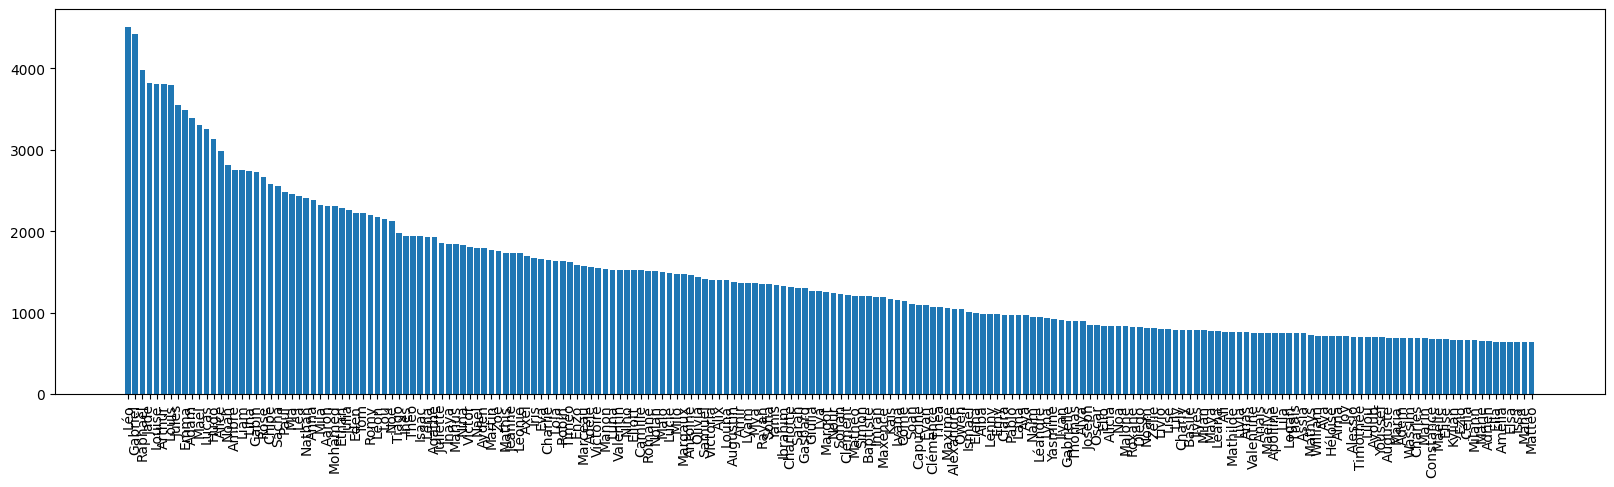

In [ ]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
plt.bar(prénom_2020['preusuel'].str.capitalize(), prénom_2020['nombre'])
plt.show()

### seaborn

Une surcouche de matplotlib. C'est bien plus joli et facile à manipuler.

Cela s'approche du mieux qe l'on peut faire actuellement https://ggplot2.tidyverse.org/index.html avec le logiciel R, qui est la réfence actuellement dans ce qui se fait de joli en graphique.

#### Palette de couleur

Seaborn utilise des palette pour représenter ses figure.

> **Attention** : pour ne pas passer pour un plouc, n'utilisez pas plus d'une dizaine de couleurs !

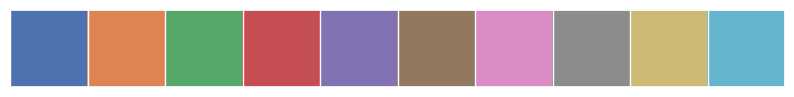

In [ ]:
import seaborn as sns

sns.set()
current_palette = sns.color_palette()
sns.palplot(current_palette) # https://seaborn.pydata.org/tutorial/color_palettes.html
plt.show()

#### graphique

On procède comme précédemment, par étape successive.
On commence par mettre l'histogramme tout bête. On va toujours procéder de la même manière :

1. créer le graphique avec matplotlib : `fig, ax = plt.subplots(figsize=(20, 5))`
2. ajouter des choses au dessin : plusieurs commandes ajoutant des choses au dessin, c'est à dire `ax`
3. représenter la figure (commande `plt.show()`) ou la sauver dans un fichier


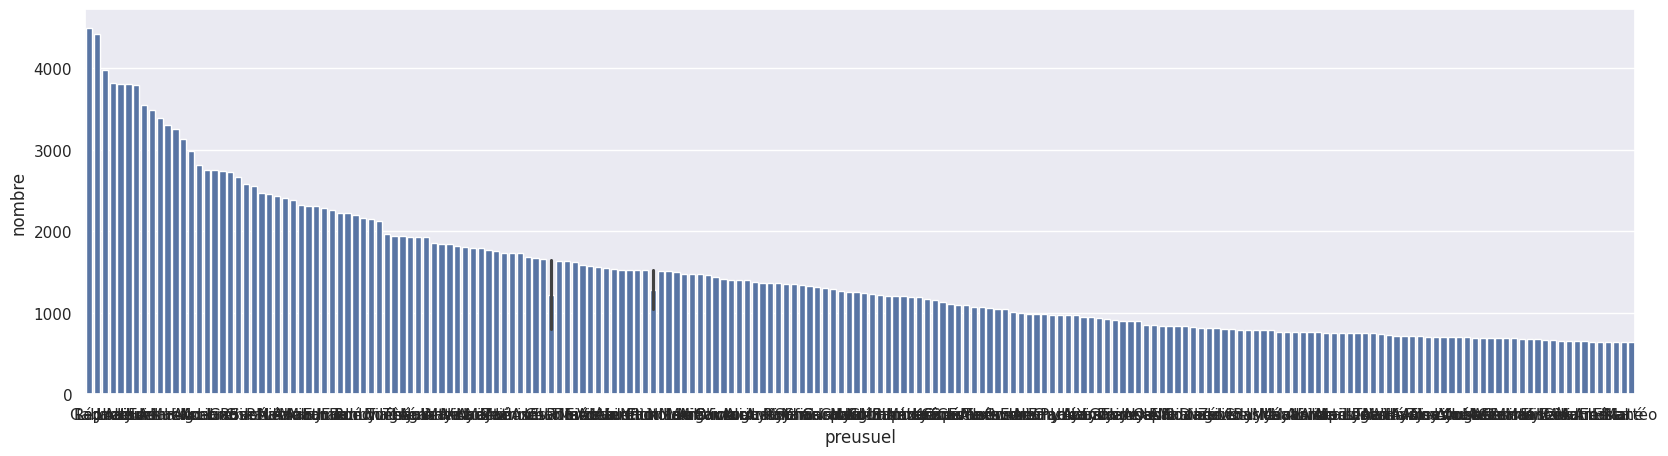

In [ ]:
# 1. créer le dessin (ici ax)
fig, ax = plt.subplots(figsize=(20, 5))

#  2. ajouter des choses au dessin
sns.barplot(x=prénom_2020['preusuel'].str.capitalize(),
            y=prénom_2020['nombre'],
            ax=ax)

# 3. représenter le graphique
plt.show()

Bon, c'est un début on va dire. Commençons par ne prendre que les 100 premiers prénoms.

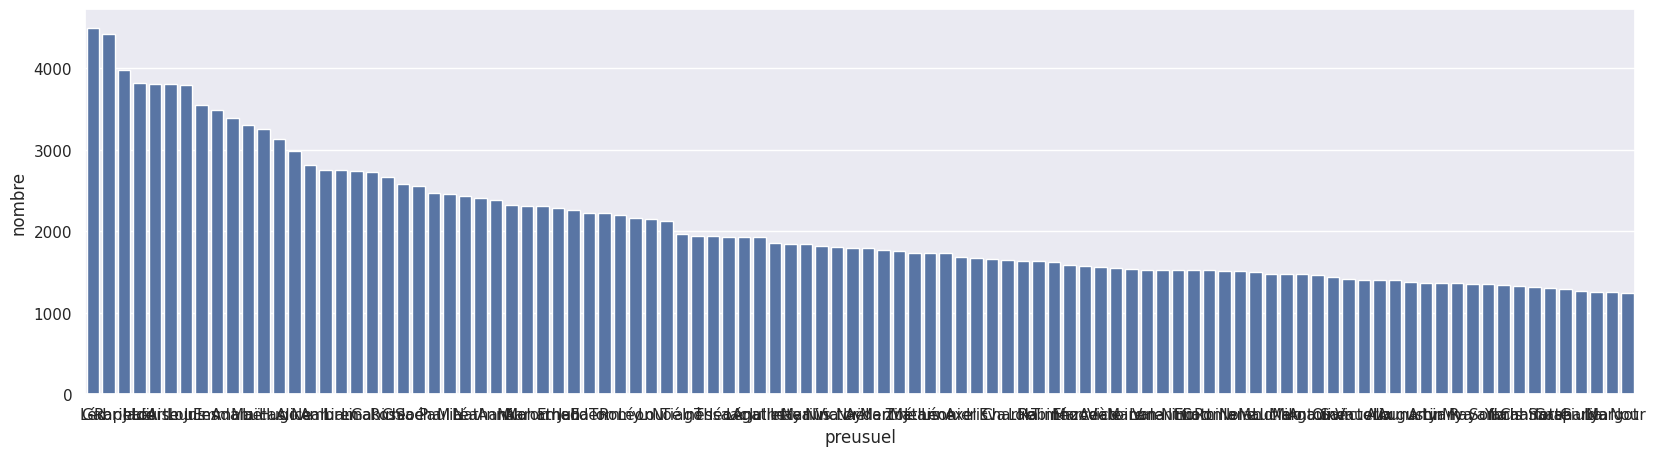

In [ ]:
data = prénom_2020.head(100)

fig, ax = plt.subplots(figsize=(20, 5))

sns.barplot(x=data['preusuel'].str.capitalize(),
            y=data['nombre'],
            ax=ax)

plt.show()

Les prénoms c'est pas ça. On va les retourner de 90°.

Pour ça, il faut modifier le dessin avant de l'afficher. On le sauve dans dans une variable (`chart`) que l'on modifie et enfin que l'on dessine (`plt.show()`)

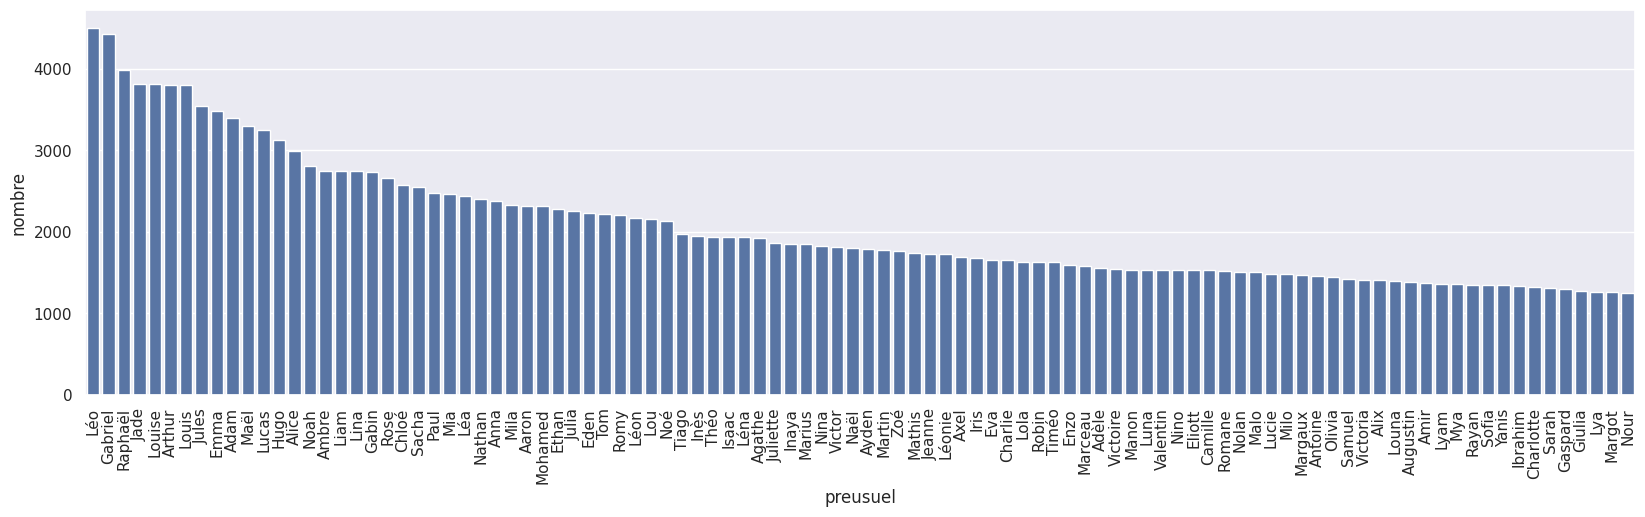

In [ ]:
data = prénom_2020.head(100)

fig, ax = plt.subplots(figsize=(20, 5))

chart = sns.barplot(x=data['preusuel'].str.capitalize(),
                    y=data['nombre'],
                    ax=ax)

plt.xticks(rotation=90)

plt.show()

On met des jolies labels au graphique :

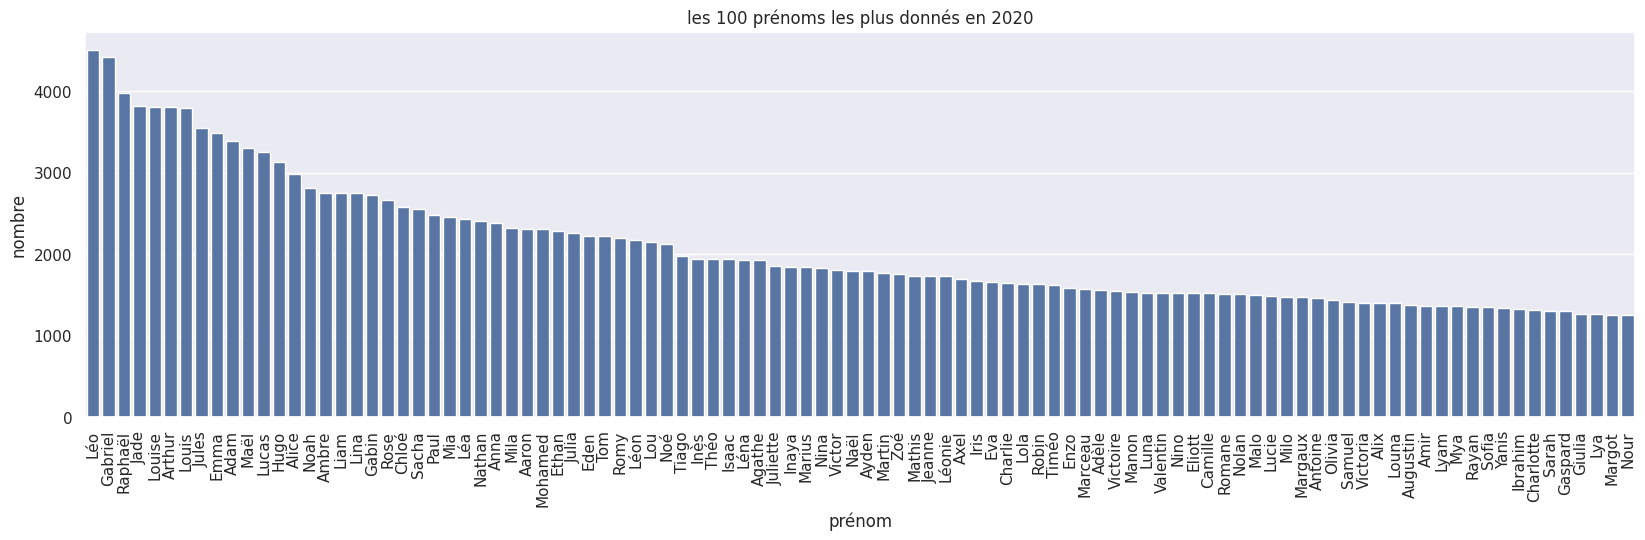

In [ ]:
data = prénom_2020.head(100)

fig, ax = plt.subplots(figsize=(20, 5))

chart = sns.barplot(x=data['preusuel'].str.capitalize(),
                    y=data['nombre'],
                    ax=ax)

plt.xticks(rotation=90)
ax.set_title("les 100 prénoms les plus donnés en 2020")
ax.set_xlabel('prénom')

plt.show()

On va donner des couleurs un peu plus réglementaires. Bleu pour les garçons et rose pour les filles :

<ipython-input-53-2e5b09ac051a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=data['preusuel'].str.capitalize(),


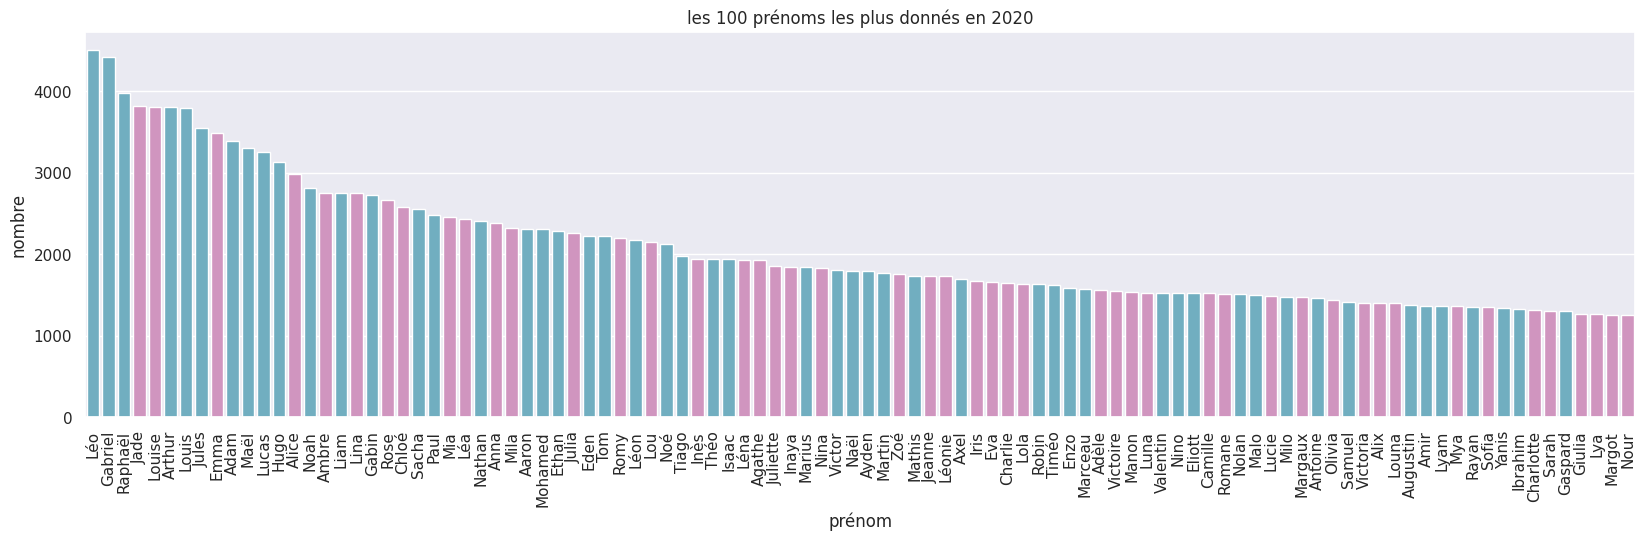

In [ ]:
data = prénom_2020.head(100)

fig, ax = plt.subplots(figsize=(20, 5))
chart = sns.barplot(x=data['preusuel'].str.capitalize(),
                    y=data['nombre'],
                    palette=[current_palette[9] if (x == 1) else current_palette[6] for x in data['sexe']],
                    ax=ax)

plt.xticks(rotation=90)
ax.set_title("les 100 prénoms les plus donnés en 2020")
ax.set_xlabel('prénom')

plt.show()

#### sauvegarde

In [ ]:
# formats supportés :

plt.gcf().canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

<Figure size 640x480 with 0 Axes>

Pour sauver, il faut refaire la figure. On remplace `plt.show()` par `plt.savefig`

<ipython-input-55-ebefa1070f95>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=data['preusuel'].str.capitalize(),


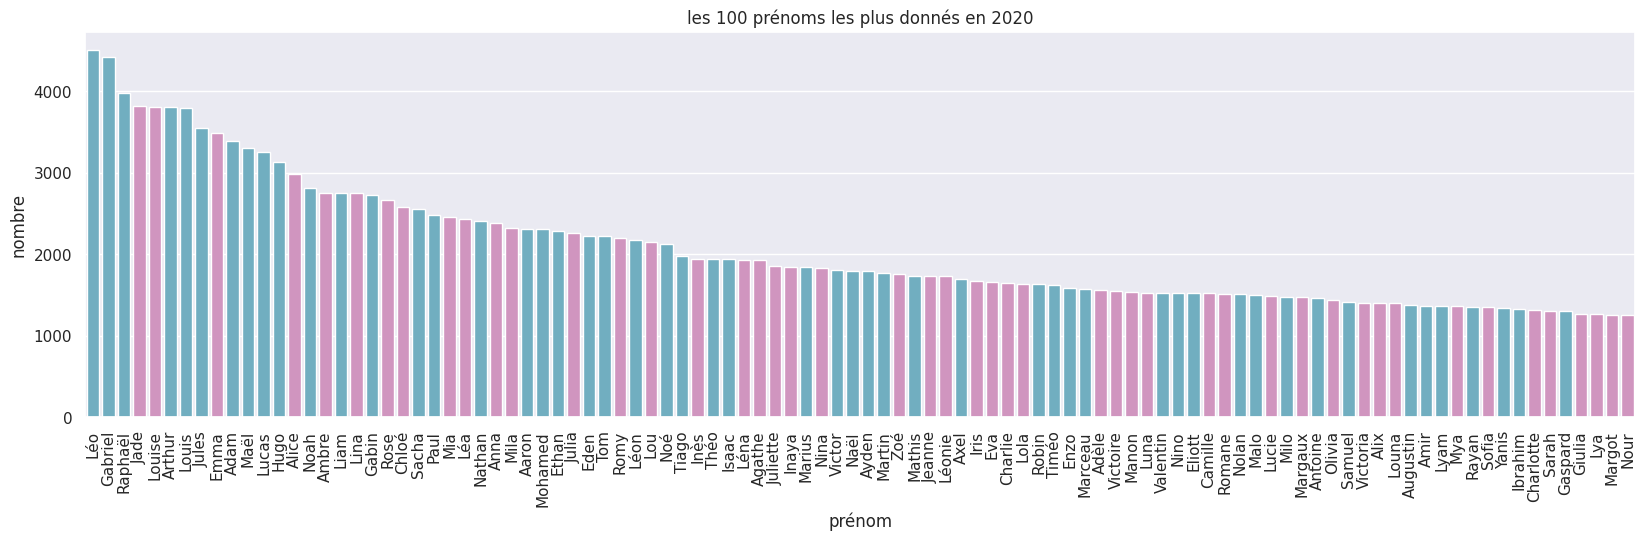

In [ ]:
data = prénom_2020.head(100)

fig, ax = plt.subplots(figsize=(20, 5))

chart = sns.barplot(x=data['preusuel'].str.capitalize(),
                    y=data['nombre'],
                    palette=[current_palette[9] if (x == 1) else current_palette[6] for x in data['sexe']],
                    ax=ax)

plt.xticks(rotation=90)
ax.set_title("les 100 prénoms les plus donnés en 2020")
ax.set_xlabel('prénom')

plt.savefig("/content/naissances_2020.pdf", format="pdf", bbox_inches='tight')